In [178]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import scipy.linalg as lg

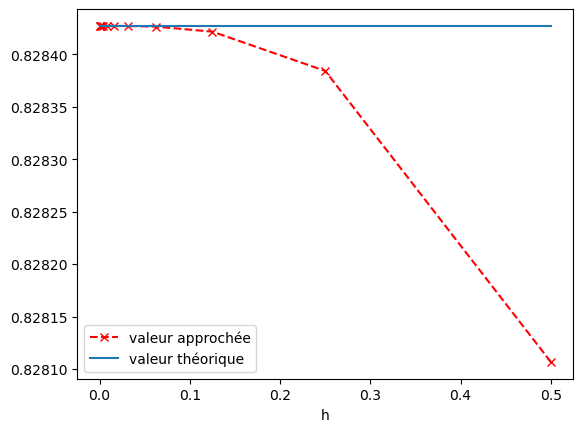

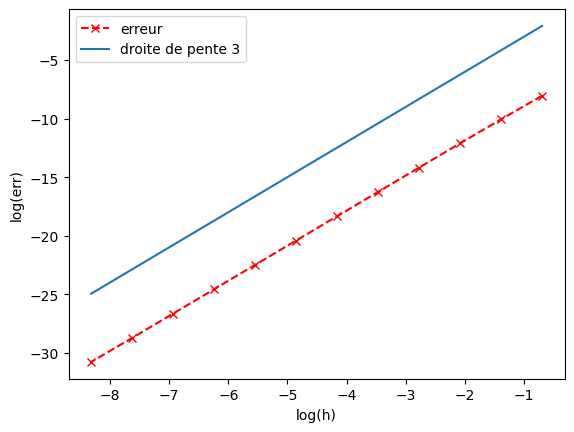

In [179]:
f = lambda t : 1/np.sqrt(t)
I = 2*(np.sqrt(2)-1)
M = 2**np.arange(1,13)
T0,T  = 1,2
INT = []
H = []
for m in M:
    h = (T-T0)/m
    H.append(h)
    value = 0
    for i in range(m):
        value = value + 3*h/4*f(T0+h*i + h/3) + h/4* f(T0+h*(i+1))
    INT.append(value)
INT = np.array(INT)
H = np.array(H)
ERR = np.abs(INT - I) # une erreur est un nombre positif


# Tracé de I_m en fonction de h
plt.figure(1)
plt.plot(H,INT,"r--x", label = "valeur approchée")
plt.plot(H, H*0+I, label = "valeur théorique")
plt.xlabel("h")
plt.legend()

# Tracé de l'erreur en fonction de h, après application d'une échelle logarithmique
plt.figure(2)
plt.plot(np.log(H),np.log(ERR), "r--x", label = "erreur")
plt.plot(np.log(H), 3*np.log(H), label = "droite de pente 3")
plt.xlabel("log(h)")
plt.ylabel("log(err)")
plt.legend()

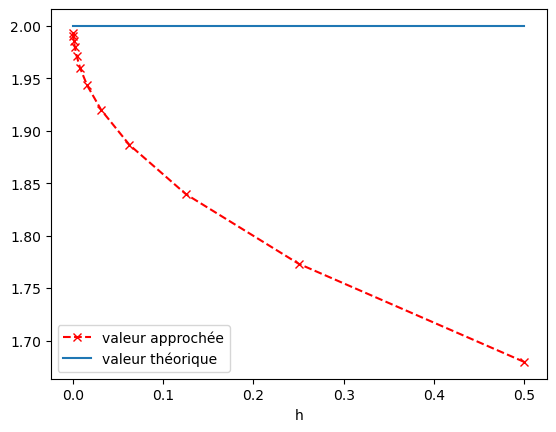

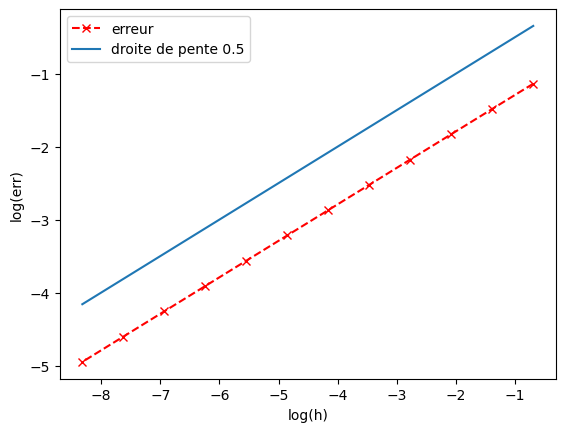

In [180]:
#Question 1b : copié collé de la cellule précédente
f = lambda t : 1/np.sqrt(t)
I = 2
M = 2**np.arange(1,13)
T0,T  = 0,1
INT = []
H = []
for m in M:
    h = (T-T0)/m
    H.append(h)
    value = 0
    for i in range(m):
        value = value + 3*h/4*f(T0+h*i + h/3) + h/4* f(T0+h*(i+1))
    INT.append(value)
INT = np.array(INT)
H = np.array(H)
ERR = np.abs(INT - I) # une erreur est un nombre positif



# Tracé de I_m en fonction de h
plt.figure(1)
plt.plot(H,INT,"r--x", label = "valeur approchée")
plt.plot(H, H*0+I, label = "valeur théorique")
plt.xlabel("h")
plt.legend()

# Tracé de l'erreur en fonction de h, après application d'une échelle logarithmique
plt.figure(2)
plt.plot(np.log(H),np.log(ERR), "r--x", label = "erreur")
plt.plot(np.log(H), 0.5*np.log(H), label = "droite de pente 0.5")
plt.xlabel("log(h)")
plt.ylabel("log(err)")
plt.legend()

**Interprétation :** La fonction $t \mapsto \frac{1}{\sqrt{t}}$ n'est pas continue en $0$. On ne peut donc pas montrer par développement de Taylor entre $t_0 = 0$ et $t_1 = h$ que la formule donnée par l'énoncé est précise à l'ordre 3.

In [181]:
# Question 2

def RKI(f,df,x0, vt, itmax = 20, eps = 10**(-6),printing = False):
    x = np.asarray(x0).ravel() # si x0 est flottant, x vaut np.array([x0]), et ne fait rien si x0 est déjà array

    n = x.shape[0]
    vx = np.zeros((len(vt),n))
    vx[0] = x0

    for k in range(len(vt)-1):
        t = vt[k]
        h = vt[k+1]-vt[k]
        x = vx[k]
        p1 = f(x,t)

        # "calcul" de p2 par une boucle de newton
        i = 0
        err_newton = 1
        p2 = p1 #si h est très petit, p2~=p1, bonne initialisation
        if k <= 6 and printing:
            print("##### New Newton iteration on p2 ##########")
        while i < itmax and err_newton > eps:
            F = p2 - f(x + (h/6)*(p1+p2),t + h/3)
            DF = np.eye(n) - (h/6)*df(x + (h/6)*(p1+p2),t + h/3)
            p2_stock = p2
            p2 = p2 - lg.solve(DF,F) 
            i = i+1
            err_newton = lg.norm(p2-p2_stock)
            if k <= 6 and i <= 5  and printing:
                print(err_newton)

        # "calcul" de xn+1 par une boucle de newton
        i = 0
        err_newton = 1
        y = x #si h est très petit, xn+1 ~= xn, bonne initialisation
        if k <= 6 and printing:
            print("##### New Newton iteration on xn+1 ##########")
        while i < itmax and err_newton > eps:
            F = y - x -(h/4)*(3*p2+f(y,t+h))
            DF = np.eye(n) - (h/4)*df(y,t+h)
            y_stock = y
            y = y - lg.solve(DF,F)
            i = i+1
            err_newton = lg.norm(y-y_stock)
            if k <= 6 and i <= 5 and printing:
                print(err_newton)
        vx[k+1] = y

    return np.array(vx)




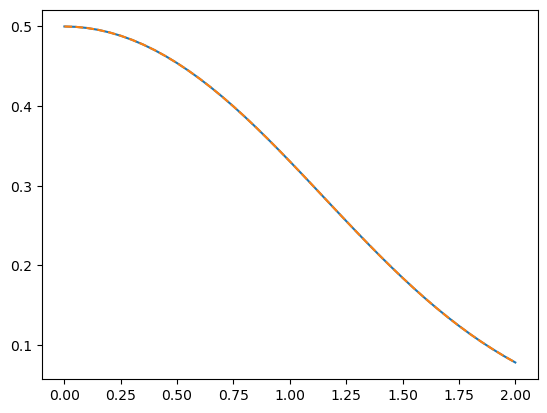

In [182]:
# Question 3a

f = lambda x,t : t*x[0]**3 - t*x[0]
df = lambda x,t : 3*t*x[0]**2 - t
x0 = 0.5
fsol = lambda t : 1/np.sqrt(1+3*np.exp(t**2))


T0,T, h = 0.,2., 0.05


vt = np.linspace(T0,T,int((T-T0)/h)+1)


vx_rki = RKI(f,df,x0,vt) # rajouter printing = True en argument pour voir la convergence de la boucle de Newton
vx_exact = fsol(vt)
vx_exact = vx_exact.reshape(-1,1)

plt.figure(1)
plt.plot(vt,vx_rki) 
plt.plot(vt,vx_exact,'--')
plt.show()




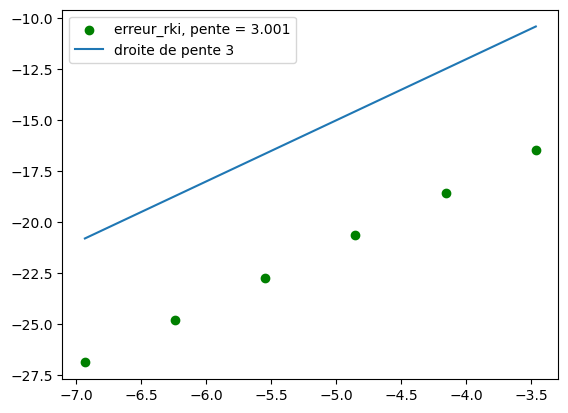

In [183]:
# Question 3b

H = 2.**(-np.arange(5,11))
Err = []
for h in H:
    vt = np.linspace(T0,T,int((T-T0)/h)+1)
    vx_rki = RKI(f,df,x0,vt)
    vx_exact = fsol(vt)
    vx_exact = vx_exact.reshape(-1,1)

    Err.append(lg.norm(vx_rki-vx_exact, ord = np.inf))
Err = np.array(Err)

a,b = np.polyfit(np.log(H),np.log(Err),deg = 1)
plt.figure()
plt.scatter(np.log(H),np.log(Err),color = "green", label = "erreur_rki, pente = {:1.3f}".format(a))
plt.plot(np.log(H),3*np.log(H), label = "droite de pente 3")
plt.legend()
plt.show()



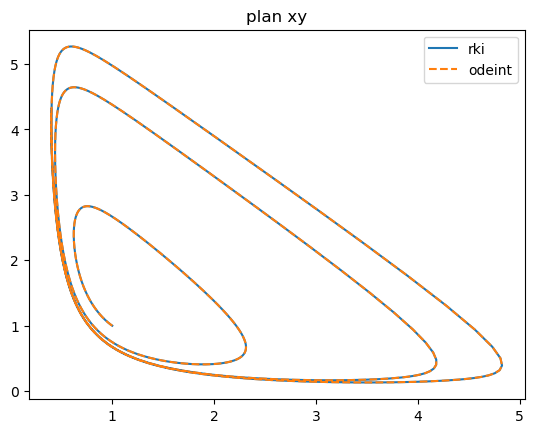

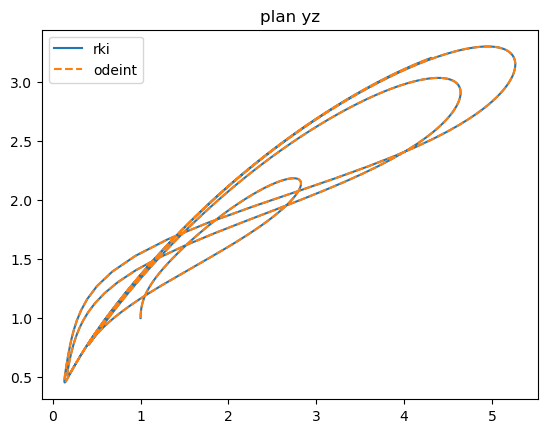

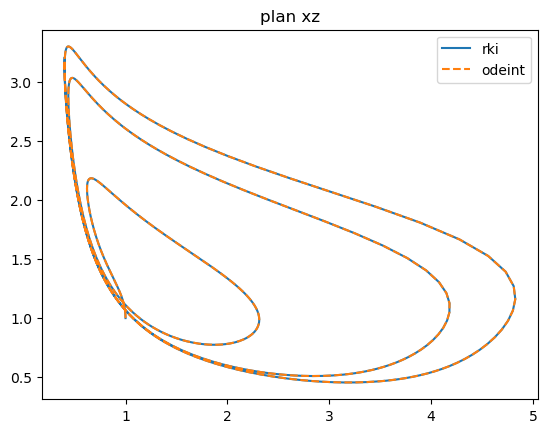

In [184]:
# Question 4

h = 0.025
x0 = np.array([1.,1,1])
T = 40
vt = np.linspace(0,T, int(T/h)+1)

f = lambda x,t : np.array([1+ x[0]**2*x[1] - (x[2]+1)*x[0],
                           x[0]*x[2] - x[0]**2*x[1],
                            -x[0]*x[2] + 1.45 ])
df = lambda x,t : np.array([
[2*x[0]*x[1] - x[2]-1, x[0]**2, -x[0]],
[x[2]- 2 * x[0]* x[1],-x[0]**2,x[0]],
[-x[2], 0, -x[0]]
])
vx_rki = RKI(f,df,x0,vt)
vx_odeint = odeint(f,x0,vt)
plt.figure()
plt.title('plan xy')
plt.plot(vx_rki[:,0],vx_rki[:,1], label = 'rki')
plt.plot(vx_odeint[:,0],vx_odeint[:,1],'--',label = 'odeint')
plt.legend()

plt.figure()
plt.title('plan yz')
plt.plot(vx_rki[:,1],vx_rki[:,2], label = 'rki')
plt.plot(vx_odeint[:,1],vx_odeint[:,2],'--',label = 'odeint')
plt.legend()

plt.figure()
plt.title('plan xz')
plt.plot(vx_rki[:,0],vx_rki[:,2], label = 'rki')
plt.plot(vx_odeint[:,0],vx_odeint[:,2],'--',label = 'odeint')
plt.legend()



**Question 4 :** 
On applique à la main la méthode abrévié ici *RKI* pour l'équation différentielle linéaire $y' = \lambda y$, avec $\lambda \in \mathbb{C}$.
Nous avons donc lors d'un itération :
$$p_1 = \lambda y_n, ~~p_2 = \lambda y_n + \frac{h}{6} (p_1 + p_2)$$
ce qui donne :
$$p_2 = \lambda \frac{1+ \frac{\lambda h}{6}}{1- \frac{\lambda h}{6}}y_n$$
On isole enfin $y_{n+1}$ dans la dernière l'équation $y_{n+1} = y_n + \frac{h}{4}(3p_2 + \lambda y_{n+1})$ pour obtenir :
$$y_{n+1} = \frac{1}{1-\frac{\lambda h}{4}}\left(1 + \frac{3\lambda h}{4}\times\frac{1+\frac{\lambda h}{6}}{1-\frac{\lambda h}{6}} \right) y_n = C(\lambda h) y_n$$
Le domaine de stabilité de la méthode est donc donnée par l'ensemble des $z = \lambda h \in \mathbb{C}$ tels que :
$C(z) := \frac{1}{1-\frac{z}{4}}\left(1 + \frac{3z}{4}\times\frac{1+\frac{z}{6}}{1-\frac{z}{6}} \right)$ est de module inférieur strictement à $1$.
On implémente le tracé la frontière de cette ensemble, (i.e.) la ligne de niveau $\{z \in \mathbb{C} | ~ |C(z)| = 1\}$.


<a list of 3 text.Text objects>

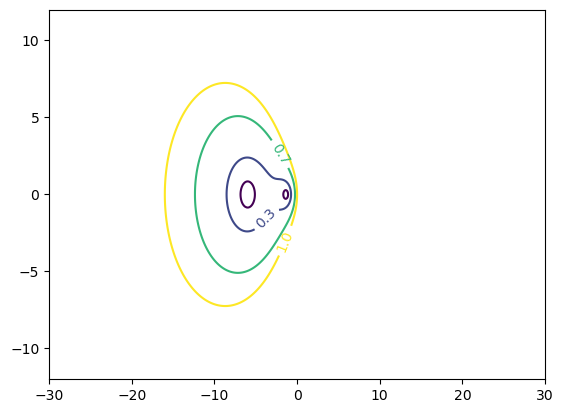

In [185]:
C = lambda z : np.abs(1/(1-z/4)*(1 + 3*z/4)*(1+z/6)/(1-z/6))
xmin,xmax,nx = -30,30,1000
ymin,ymax,ny = -12,12,1000
vx = np.linspace(xmin,xmax, nx)
vy = np.linspace(ymin,ymax, ny)
VX,VY = np.meshgrid(vx,vy)

Z = C(VX+1j*VY)

CS = plt.contour(VX,VY,Z,levels= [0.1, 0.3,0.7,1.])
plt.clabel(CS, fontsize=10)

